### 1. Import all necessary libraries

In [1]:
import sys
import os
import pandas as pd 
import numpy as np 
import scipy as sp 
import sklearn 

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### 2. Read all stock data

In [2]:
df = pd.read_csv('/Users/jiviteshshah/University/Machine learning/Project/stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv', parse_dates=['Date'])

In [3]:
df.Date = pd.to_datetime(df.Date)

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,93587.000000,93602.000000,93592.000000,93612.000000,9.361200e+04
mean,85.623260,86.387045,84.836664,85.641753,2.015667e+07
std,108.151723,108.956365,107.225361,108.121106,3.442108e+07
min,6.750000,7.170000,0.000000,6.660000,0.000000e+00
25%,33.950000,34.290000,33.600000,33.960000,5.040180e+06
50%,60.040000,60.630000,59.490000,60.050000,9.701142e+06
75%,94.000000,94.740000,93.250000,94.012500,2.075222e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,8.432640e+08


### 3. Data Cleaning

In [5]:
df.isnull().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

In [6]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
2913,2017-07-31,NaN,201.66,NaN,201.17,1833625,MMM
5933,2017-07-31,NaN,85.70,NaN,85.23,3079797,AXP
11972,2017-07-31,NaN,NaN,NaN,242.46,5777271,BA
14992,2017-07-31,NaN,NaN,NaN,113.95,4486013,CAT
18012,2017-07-31,NaN,110.00,NaN,109.19,7561205,CVX
24051,2017-07-31,NaN,NaN,45.79,45.84,13622891,KO
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS
27071,2017-07-31,NaN,110.14,NaN,109.93,6815349,DIS
30091,2017-07-31,NaN,80.39,NaN,80.04,12820175,XOM
33111,2017-07-31,NaN,25.69,NaN,25.61,30616287,GE


In [7]:
gdf = df[df.Name == 'AABA']
cdf = df[df.Name == 'CAT']
cdf[~cdf.Date.isin(gdf.Date)]

,Date,Open,High,Low,Close,Volume,Name
13147,2010-04-01,63.29,64.2,63.29,63.99,7830447,CAT


In [8]:
df.set_index('Date', inplace=True)

#Backfill `Open` column
values = np.where(df['2017-07-31']['Open'].isnull(), df['2017-07-28']['Open'], df['2017-07-31']['Open'])
df['2017-07-31']= df['2017-07-31'].assign(Open=values.tolist())

values = np.where(df['2017-07-31']['Close'].isnull(), df['2017-07-28']['Close'], df['2017-07-31']['Close'])
df['2017-07-31']= df['2017-07-31'].assign(Close=values.tolist())

values = np.where(df['2017-07-31']['High'].isnull(), df['2017-07-28']['High'], df['2017-07-31']['High'])
df['2017-07-31']= df['2017-07-31'].assign(High=values.tolist())

values = np.where(df['2017-07-31']['Low'].isnull(), df['2017-07-28']['Low'], df['2017-07-31']['Low'])
df['2017-07-31']= df['2017-07-31'].assign(Low=values.tolist())

df.reset_index(inplace=True)

In [9]:
missing_data_stocks = ['CSCO','AMZN','INTC','AAPL','MSFT','MRK','GOOGL', 'AABA']
columns = df.columns.values

In [10]:
for stock in missing_data_stocks:
    tdf = df[(df.Name == stock) & (df.Date == '2014-03-28')].copy()
    tdf.Date = '2014-04-01'
    pd.concat([df, tdf])
print("Complete")

Complete


In [11]:
df[(df.Name == 'CSCO') & (df.Date == '2014-04-01')]

,Date,Open,High,Low,Close,Volume,Name
20192,2014-04-01,22.33,23.31,22.3,23.1,80113826,CSCO


In [12]:
df[df.Open.isnull()]

,Date,Open,High,Low,Close,Volume,Name
25815,2012-08-01,NaN,NaN,NaN,49.14,0,DIS


In [13]:
df = df[~((df.Date == '2012-08-01') & (df.Name == 'DIS'))]

In [14]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [15]:
ibm_data = df[df.Name == 'AAPL'].copy()

In [16]:
ibm_data.drop(['Date'],1,inplace=True)
ibm_data.drop(['Name'],1,inplace=True)

In [17]:
ibm_data.head()

,Open,High,Low,Close,Volume
6040,10.34,10.68,10.32,10.68,201853036
6041,10.73,10.85,10.64,10.71,155225609
6042,10.69,10.70,10.54,10.63,112396081
6043,10.75,10.96,10.65,10.90,176139334
6044,10.96,11.03,10.82,10.86,168861224


In [18]:
cols = ibm_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['Volume', 'Open', 'High', 'Low', 'Close']

In [19]:
ibm_data_reshaped = ibm_data[cols]
ibm_data_reshaped.head()

,Volume,Open,High,Low,Close
6040,201853036,10.34,10.68,10.32,10.68
6041,155225609,10.73,10.85,10.64,10.71
6042,112396081,10.69,10.70,10.54,10.63
6043,176139334,10.75,10.96,10.65,10.90
6044,168861224,10.96,11.03,10.82,10.86


### 4. Data Split + Normalize

In [20]:
from sklearn.preprocessing import StandardScaler
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df.Close.values.reshape(-1,1))
    return df

In [21]:
ibm_data_norm = ibm_data_reshaped.copy()
ibm_data_norm = normalize_data(ibm_data_norm)
ibm_data_norm.head()

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,Volume,Open,High,Low,Close
6040,0.228877,0.017589,0.018392,0.018785,0.020333
6041,0.172820,0.019914,0.019394,0.020693,0.020511
6042,0.121329,0.019676,0.018510,0.020097,0.020038
6043,0.197963,0.020033,0.020042,0.020753,0.021634
6044,0.189213,0.021285,0.020455,0.021766,0.021397


In [22]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [23]:
window = 30
X_train, y_train, X_test, y_test = load_data(ibm_data_norm, window)
print (X_train[0], y_train[0])

[[0.22887693 0.01758884 0.01839189 0.01878466 0.02033337]
 [0.17282008 0.01991414 0.01939401 0.02069295 0.0205107 ]
 [0.12132917 0.01967565 0.01850979 0.02009661 0.02003783]
 [0.19796317 0.02003339 0.02004244 0.02075258 0.02163376]
 [0.18921321 0.02128548 0.02045508 0.02176635 0.02139733]
 [0.67158007 0.02086811 0.02440462 0.02182599 0.02547582]
 [0.4352947  0.02736704 0.0268215  0.02761047 0.0280766 ]
 [0.37115948 0.02832101 0.02817732 0.02850498 0.02837215]
 [0.2196202  0.02832101 0.02788257 0.02933985 0.02949521]
 [0.23772802 0.02891724 0.02817732 0.02868388 0.0287268 ]
 [0.35081479 0.02671119 0.02623202 0.0269545  0.02683532]
 [0.49606876 0.02516098 0.02422778 0.02433061 0.023939  ]
 [0.32839965 0.02349153 0.02281302 0.02182599 0.02145644]
 [0.30472504 0.02074887 0.02245933 0.02200489 0.02281594]
 [0.32963437 0.02301455 0.02234143 0.02176635 0.02139733]
 [0.36973841 0.02188171 0.02069087 0.01961954 0.0198605 ]
 [0.34158118 0.01943716 0.01898137 0.01854613 0.01826457]
 [0.27305185 0

### 5. Visualize

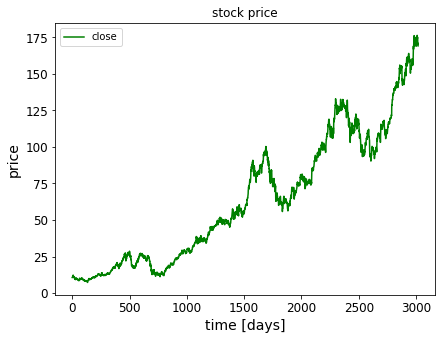

In [24]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(ibm_data.Close.values, color='green', label='close')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

### 6.  Model LSTM

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

/Users/jiviteshshah/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
def create_simple_model():
    model = Sequential()
    model.add(LSTM(units = 10, return_sequences = False, input_shape = (X_train.shape[1], 5)))
    model.add(Dense(units = 1))
    return model

In [27]:
def compile_and_run(model, epochs=50, batch_size=64):
    model.compile(metrics=['accuracy'], optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=3)
    return history

In [28]:
def plot_metrics(history):
    metrics_df = pd.DataFrame(data={"loss": history.history['loss']})
    metrics_df.plot()

In [29]:
simple_model = create_simple_model()
history = compile_and_run(simple_model, epochs=20)

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


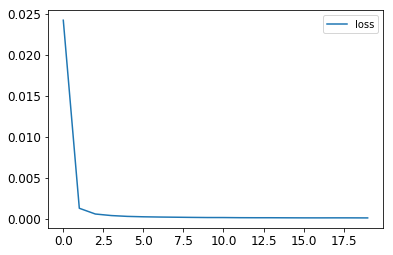

In [30]:
plot_metrics(history)

In [31]:
final_predictions = simple_model.predict(X_test)

In [32]:
y_test.shape

(299,)

In [33]:
final_predictions.shape

(299, 1)

In [34]:
y_new = final_predictions.reshape(299,)

In [35]:
y_new.shape

(299,)

In [36]:
def make_predictions(X_test, model):
    final_predictions = model.predict(X_test)
    fp = np.ndarray.flatten(final_predictions)
    ap = np.ndarray.flatten(y_test)
    pdf = pd.DataFrame(data={'Actual': ap, 'Predicted': fp})
    ax = pdf.plot()

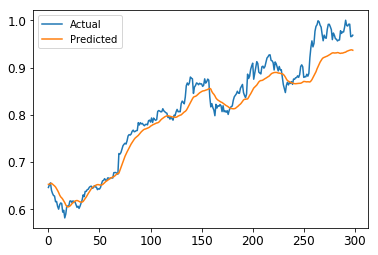

In [37]:
make_predictions(X_test, simple_model)

In [38]:
def create_dl_model():
    model = Sequential()

    # Adding the first LSTM layer
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))

    # Adding a second LSTM layer
    model.add(LSTM(units = 50, return_sequences = True))
    
    # Adding a third LSTM layer
    model.add(LSTM(units = 50, return_sequences = True))

    # Adding a fourth LSTM layer
    model.add(LSTM(units = 50))

    # Adding the output layer
    model.add(Dense(units = 1))
    return model

In [39]:
dl_model = create_dl_model()
dl_model.summary()
history = compile_and_run(dl_model, epochs=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 50)            11200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 71,851
Trainable params: 71,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epo

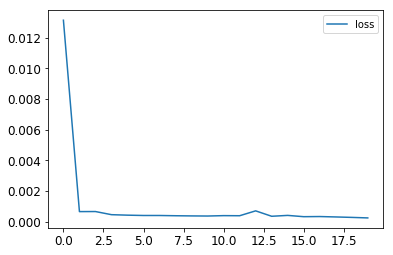

In [40]:
plot_metrics(history)

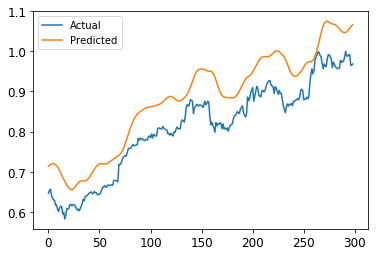

In [41]:
make_predictions(X_test, dl_model)

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
simple_train_predictions = simple_model.predict(X_train)
simple_mse = mean_squared_error(y_train, simple_train_predictions)
simple_mse = np.sqrt(simple_mse)
simple_mse

0.011530980738124802

In [44]:
dl_train_predictions = dl_model.predict(X_train)
dl_mse = mean_squared_error(y_train, dl_train_predictions)
dl_mse = np.sqrt(dl_mse)
dl_mse

0.03679087981452868

In [ ]:
plt.plot(ibm_test_y.as_matrix(), color='red',label='Real AAPL Stock Price')
plt.plot(poly_predictions_test, color='blue',label='Predicted AAPL Stock Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()